## Wrangle, Clean and Visualize FIFA 21 Player Data

### By Krishna Nadoor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Step 1 - Load the Data

In [2]:
# Load dataset and retrieve sample
df = pd.read_csv('FIFA21_official_data.csv')
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
13886,252758,D. Devoy,18,https://cdn.sofifa.com/players/252/758/20_60.png,Republic of Ireland,https://cdn.sofifa.com/flags/ie.png,52,67,Bohemian FC,https://cdn.sofifa.com/teams/305/light_30.png,...,45.0,7.0,7.0,6.0,13.0,11.0,CAM,54.0,€218K,37.0
4441,186954,B. Ideye,31,https://cdn.sofifa.com/players/186/954/20_60.png,Nigeria,https://cdn.sofifa.com/flags/ng.png,71,71,Göztepe SK,https://cdn.sofifa.com/teams/101026/light_30.png,...,27.0,15.0,13.0,13.0,7.0,9.0,ST,71.0,€4.2M,30.0
6120,221664,W. Cartagena,25,https://cdn.sofifa.com/players/221/664/20_60.png,Peru,https://cdn.sofifa.com/flags/pe.png,65,70,Godoy Cruz,https://cdn.sofifa.com/teams/111706/light_30.png,...,59.0,15.0,13.0,8.0,8.0,14.0,CDM,66.0,€991K,61.0
9403,212772,O. Duarte,31,https://cdn.sofifa.com/players/212/772/20_60.png,Costa Rica,https://cdn.sofifa.com/flags/cr.png,72,72,Levante UD,https://cdn.sofifa.com/teams/1853/light_30.png,...,72.0,15.0,9.0,7.0,8.0,14.0,CB,72.0,€4.8M,70.0
3259,219732,G. Nkoudou,25,https://cdn.sofifa.com/players/219/732/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,75,78,Beşiktaş JK,https://cdn.sofifa.com/teams/327/light_30.png,...,39.0,10.0,13.0,8.0,6.0,13.0,CAM,76.0,€17.6M,32.0


### Step 2 -  Exploratory Data Analysis

In [3]:
# Get Top 5
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [4]:
# Get bottom 5
df.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,13.0,48.0,51.0,56.0,40.0,56.0,GK,49.0,€120K,NaN
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,10.0,52.0,55.0,52.0,42.0,57.0,GK,51.0,€83K,5.0
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,11.0,50.0,49.0,50.0,53.0,55.0,GK,51.0,€149K,8.0
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,10.0,50.0,51.0,49.0,50.0,51.0,GK,49.0,€94K,8.0
17107,245862,19 J. Milli,18,https://cdn.sofifa.com/players/245/862/19_60.png,Italy,https://cdn.sofifa.com/flags/it.png,47,65,Lecce,https://cdn.sofifa.com/teams/347/light_30.png,...,11.0,52.0,52.0,52.0,40.0,44.0,GK,46.0,€109K,NaN


In [5]:
# Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

In [6]:
# Get summary statistics
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17088.000000,17108.000000,...,942.000000,17108.000000,17069.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,16166.000000
mean,221421.276187,25.053718,66.780161,72.553542,1625.722995,1.147533,2.981938,2.446107,20.756145,51.360065,...,46.403397,48.101473,45.933271,15.660744,15.529928,15.469839,15.550853,15.771510,67.753799,47.014475
std,36028.786065,4.915963,7.019069,5.738347,263.503922,0.455773,0.674699,0.780278,17.194590,17.954050,...,21.803653,21.532834,21.213315,16.910205,16.212333,15.977547,16.448905,17.209624,6.773192,20.152543
min,2.000000,16.000000,38.000000,46.000000,731.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,4.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,3.000000
25%,205451.750000,21.000000,62.000000,69.000000,1484.000000,1.000000,3.000000,2.000000,9.000000,40.000000,...,25.250000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,63.000000,29.000000
50%,230441.000000,24.000000,67.000000,72.000000,1653.000000,1.000000,3.000000,2.000000,18.000000,55.000000,...,48.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,52.000000
75%,245402.500000,28.000000,72.000000,76.000000,1810.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,66.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,72.000000,64.000000
max,259105.000000,53.000000,93.000000,95.000000,2316.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,90.000000,93.000000,94.000000


In [7]:
# Total null records in Club field
sum(df.Club.isnull())

325

In [8]:
# Get sample of Joined date (it's Object not date format)
df.Joined

0        Sep 25, 2020
1        Aug 30, 2015
2        Jan 30, 2020
3        Jul 12, 2019
4        Sep 14, 2020
             ...     
17103     Mar 2, 2018
17104     Jul 1, 2019
17105     Jul 1, 2019
17106    Mar 31, 2019
17107     Jul 1, 2018
Name: Joined, Length: 17108, dtype: object

In [9]:
# Value counts for Clubs
df.Club.value_counts()

Manchester United     45
Crystal Palace        44
Arsenal               44
Chelsea               44
Bolton Wanderers      44
                      ..
Sandecja Nowy Sącz     1
FC Barcelona B         1
SV Mattersburg         1
KSV 1919               1
Sakaryaspor            1
Name: Club, Length: 843, dtype: int64

In [10]:
# Value counts for a player's Work Rate

# In football, the Work Rate (Attacking / Defending) refers to the extend a player contributes to running and
# chasing in a match while not in possession of a ball.
# Source: https://en.wikipedia.org/wiki/Work_rate
df['Work Rate'].value_counts()

Medium/ Medium    8544
High/ Medium      3318
Medium/ High      1619
High/ High        1013
Medium/ Low        943
High/ Low          773
Low/ Medium        426
Low/ High          363
N/A/ N/A            59
Low/ Low            50
Name: Work Rate, dtype: int64

### Data Issues
#### Define Cleaning Tasks

#### Tidiness (1)
* Create extra fields to store the Work Rate (Attacking / Defending)

#### Quality (11)
* Cleanup Work Rate fields:
 * Remove Blank Spaces
 * Remove N/A from affected cells
 * Convert Work Rate fields to Categorical data types
* Remove Euro currency symbols from monetary fields and rename field to include Euro symbol
* Split 'lbs' from 'Weight'
* Drop all rows where the club value is null.
* Convert 'Joined' field to datetime field.
* Convert all rows to show only the Year component in the 'Contract Valid Until' field
 * Change to Categorical data type
* Convert the 'Nationality' field to Categorical data type.
* Convert all three of the monetary fields (Wage, Value, Release Clause) into whole numbers:
 * i.e., 64.4M becomes 64600000, 400K becomes 400000 etc.
* Drop redundant 'Marking' and 'Loaned From' columns
* Remove 'nan' from monetary fields (Wage, Value, Release Clause) and replace with 0
* Convert Monetary Fields to float

### Step 3 - Data Cleaning

In [11]:
# Create a copy of the original dataframes to work on
df_copy = df.copy()

#### Quality
#### Issue 1 - Cleanup the Work Rate Field

#### Define

* Cleanup Work Rate fields:
 * Remove Blank Spaces
 * Remove N/A from affected cells
 * Convert Work Rate fields to Categorical data types

#### Code

In [12]:
# Prior to cleanup
df['Work Rate'].value_counts()

Medium/ Medium    8544
High/ Medium      3318
Medium/ High      1619
High/ High        1013
Medium/ Low        943
High/ Low          773
Low/ Medium        426
Low/ High          363
N/A/ N/A            59
Low/ Low            50
Name: Work Rate, dtype: int64

In [13]:
df['Work Rate'].dtype

dtype('O')

In [14]:
# Strip spaces
df['Work Rate'] = df['Work Rate'].str.replace(' ','')

# Remove N/A's
df['Work Rate'] = df['Work Rate'].str.replace('N/A/N/A','')

# Convert Object field to Categorical datatype
df['Work Rate'] = df['Work Rate'].astype('category')

#### Test

In [15]:
df['Work Rate'].value_counts()

Medium/Medium    8544
High/Medium      3318
Medium/High      1619
High/High        1013
Medium/Low        943
High/Low          773
Low/Medium        426
Low/High          363
                   59
Low/Low            50
Name: Work Rate, dtype: int64

In [16]:
print(df['Work Rate'].dtype)

category


#### Issue 2 - Remove Euro currency symbols from monetary fields and rename field to include Euro symbol

#### Define

* Remove Euro currency symbols from all monetary fields
 * Wage
 * Value
 * Release Clause
* Add Euro currency to monetary field headers

#### Code

In [17]:
df[['Wage', 'Value','Release Clause']]

,Wage,Value,Release Clause
0,€115K,€31.5M,€64.6M
1,€370K,€87M,€161M
2,€195K,€63M,€124.4M
3,€290K,€50.5M,€103.5M
4,€41K,€22M,€46.2M
...,...,...,...
17103,€500,€50K,€120K
17104,€500,€50K,€83K
17105,€500,€60K,€149K
17106,€500,€50K,€94K


In [18]:
# Strip Euro € from monetary column values
cols = ['Wage', 'Value','Release Clause']

for item in cols:
    df[item] = df[item].astype(str).map(lambda x: x.lstrip('€'))

In [19]:
# Update header names using dictionary
# key = old column name
# value = new column name
dict = {'Wage':'Wage (€)',
        'Value':'Value (€)',
        'Release Clause':'Release Clause (€)'}

# Rename dataframe fields
df.rename(columns=dict, inplace=True)

#### Test

In [20]:
df[['Wage (€)', 'Value (€)','Release Clause (€)']]

,Wage (€),Value (€),Release Clause (€)
0,115K,31.5M,64.6M
1,370K,87M,161M
2,195K,63M,124.4M
3,290K,50.5M,103.5M
4,41K,22M,46.2M
...,...,...,...
17103,500,50K,120K
17104,500,50K,83K
17105,500,60K,149K
17106,500,50K,94K


#### Issue 3 - Remove 'lbs' from the 'Weight' field

#### Define

* Remove 'lbs' from all rows in the 'Weight' field
* Rename field to 'Weight (lbs)'
* Change datatype from Object to Int

##### Code

In [21]:
df['Weight']

0        190lbs
1        154lbs
2        152lbs
3        161lbs
4        152lbs
          ...  
17103    176lbs
17104    187lbs
17105    176lbs
17106    168lbs
17107    172lbs
Name: Weight, Length: 17108, dtype: object

In [22]:
# Remove 'lbs'
df['Weight'] = df['Weight'].astype(str).map(lambda x: x.rstrip('lbs'))

# Convert Object field to Integer datatype
df['Weight'] = df['Weight'].astype('int')

# Rename field
dict = {'Weight':'Weight (lbs)'}

# Rename dataframe field
df.rename(columns=dict, inplace=True)

##### Test

In [23]:
df['Weight (lbs)']

0        190
1        154
2        152
3        161
4        152
        ... 
17103    176
17104    187
17105    176
17106    168
17107    172
Name: Weight (lbs), Length: 17108, dtype: int32

#### Issue 4 - Drop all rows where the 'Club' row value is null

#### Define

* Drop all rows that have a null in the 'Club' field

##### Code

In [24]:
# Check total number of null values in the 'Club' field
sum(df.Club.isnull())

325

In [25]:
# Drop all empty rows that have an empty Club row value
df.dropna(subset=['Club'], inplace=True)

#### Test

In [26]:
# Check total number of null values in the 'Club' field is zero
sum(df.Club.isnull()) == 0

True

#### Issue 5 - Convert 'Joined' field to datetime field
#### Define
* Convert field type to datetime

#### Code

In [27]:
df['Joined'].dtype

dtype('O')

In [28]:
# Convert the 'Joined' field from object to datetime
df['Joined'] = pd.to_datetime(df['Joined'])

#### Test

In [29]:
df['Joined'].dtype

dtype('<M8[ns]')

#### Issue 6 - Convert all rows to show only the Year component in the 'Contract Valid Until' field and convert to Categorical datatype
#### Define
* Convert all rows to show only the Year component in the 'Contract Valid Until' field
* Convert field to categorical datatype

#### Code

In [30]:
# Check quality of column
df['Contract Valid Until']

0        2022
1        2023
2        2025
3        2024
4        2024
         ... 
17103    2021
17104    2022
17105    2021
17106    2022
17107    2020
Name: Contract Valid Until, Length: 16783, dtype: object

In [31]:
# Data contains rows that contain the date as well and not just the Year
print(df['Contract Valid Until'].iloc[10840])
print(df['Contract Valid Until'].iloc[10557])

Jun 30, 2021
Jun 30, 2015


In [32]:
# Find the Year component
# The str extract method is used to find the year component in each row using Regular Expressions
df['Contract_Valid_Till_Year'] = df['Contract Valid Until'].str.extract(r'(\d{4}$)', expand=True)

# Drop original column
df.drop('Contract Valid Until', axis=1, inplace=True)

# Rename 'Contract_Valid_Till_Year' to 'Contract Valid Until'
df.rename(columns={"Contract_Valid_Till_Year": "Contract Valid Until"}, inplace=True)

# Convert field to Categorical datatype
df['Contract Valid Until'] = df['Contract Valid Until'].astype('category')

#### Test

In [33]:
# Check that only the Year component shows
print(df['Contract Valid Until'].iloc[10840])
print(df['Contract Valid Until'].iloc[10557])
print(df['Contract Valid Until'].dtype == 'category')

2021
2015
True


#### Issue 7 - Convert the 'Nationality' field to Categorical data type
#### Define
* Convert field to categorical data type.

#### Code

In [34]:
# Check datatype before cleansing operation
print(df['Nationality'].dtype)

# Convert datatype to categorical
df['Nationality'] = df['Nationality'].astype('category')

object


#### Test

In [35]:
# Check datatype after cleansing operation
df['Nationality'].dtype

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                  'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba',
                  'Australia',
                  ...
                  'Ukraine', 'United Arab Emirates', 'United States',
                  'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Wales',
                  'Zambia', 'Zimbabwe'],
                 ordered=False)

#### Issue 8 - Convert all three of the monetary fields (Wage, Value, Release Clause) into whole numbers
#### Define
* Convert all three of the monetary fields (Wage, Value, Release Clause) into whole numbers:
 * i.e., 64.4M becomes 64400000, 400K becomes 400000, values without M or K stay as-is etc.

#### Code

In [36]:
# Check existing values
df[['Name','Wage (€)', 'Value (€)', 'Release Clause (€)']]

,Name,Wage (€),Value (€),Release Clause (€)
0,L. Suárez,115K,31.5M,64.6M
1,K. De Bruyne,370K,87M,161M
2,Bruno Fernandes,195K,63M,124.4M
3,A. Griezmann,290K,50.5M,103.5M
4,M. Acuña,41K,22M,46.2M
...,...,...,...,...
17103,19 C. Miszta,500,50K,120K
17104,B. Voll,500,50K,83K
17105,T. Parker,500,60K,149K
17106,H. Sveijer,500,50K,94K


In [37]:
# Begin cleansing operations

# The apply() function applies the lambda function to each row in the dataframe
# Cleanse the Wage
df['Wage (€)'] = df['Wage (€)'].apply(lambda x: int(float(x.replace("K",""))*1000) if "K" in x else x)

In [38]:
# Cleanse the 'Value (€)' column of the M's
df['Value (€)'] = df['Value (€)'].apply(lambda x: int(float(x.replace("M",""))*1000000) if "M" in x else x)

In [39]:
# Cleanse the 'Value (€)' column of the K's
# Need to convert the column to string first to ensure that the string function, replace(), works as expected
df['Value (€)'] = df['Value (€)'].astype('str')
df['Value (€)'] = df['Value (€)'].apply(lambda x: int(float(x.replace("K",""))*1000) if "K" in x else x)

In [40]:
# Cleanse the 'Release Clause (€)' column of the M's
df['Release Clause (€)'] = df['Release Clause (€)'].astype('str')
df['Release Clause (€)'] = df['Release Clause (€)'].apply(lambda x: int(float(x.replace("M",""))*1000000) if "M" in x else x)

In [41]:
# Cleanse the 'Release Clause (€)' column of the K's
df['Release Clause (€)'] = df['Release Clause (€)'].astype('str')
df['Release Clause (€)'] = df['Release Clause (€)'].apply(lambda x: int(float(x.replace("K",""))*1000) if "K" in x else x)

#### Test

In [42]:
# Check existing values
df[['Name','Wage (€)', 'Value (€)', 'Release Clause (€)']]

,Name,Wage (€),Value (€),Release Clause (€)
0,L. Suárez,115000,31500000,64599999
1,K. De Bruyne,370000,87000000,161000000
2,Bruno Fernandes,195000,63000000,124400000
3,A. Griezmann,290000,50500000,103500000
4,M. Acuña,41000,22000000,46200000
...,...,...,...,...
17103,19 C. Miszta,500,50000,120000
17104,B. Voll,500,50000,83000
17105,T. Parker,500,60000,149000
17106,H. Sveijer,500,50000,94000


#### Issue 9 -  Drop redundant columns
#### Define
* Drop redundant 'Marking' and 'Loaned From' columns

#### Code

In [43]:
# Check existing values
df[['Marking','Loaned From']]

,Marking,Loaned From
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17103,5.0,NaN
17104,NaN,NaN
17105,NaN,NaN
17106,NaN,NaN


In [44]:
# Check count of total columns in dataframe
df.shape[1]

65

In [45]:
# Drop columns
drop_cols = ['Marking','Loaned From']
df = df.drop(columns=drop_cols)

#### Test

In [46]:
# Check if the dropped columns exist
deleted_cols = ['Marking','Loaned From']

for check in deleted_cols:
    print(check in df.columns)

False
False


In [47]:
# Check count of total columns in dataframe after dropping
df.shape[1]

63

In [48]:
# Check if the dropped columns exist via a visual approach
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16783 entries, 0 to 17107
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16783 non-null  int64         
 1   Name                      16783 non-null  object        
 2   Age                       16783 non-null  int64         
 3   Photo                     16783 non-null  object        
 4   Nationality               16783 non-null  category      
 5   Flag                      16783 non-null  object        
 6   Overall                   16783 non-null  int64         
 7   Potential                 16783 non-null  int64         
 8   Club                      16783 non-null  object        
 9   Club Logo                 16783 non-null  object        
 10  Value (€)                 16783 non-null  object        
 11  Wage (€)                  16783 non-null  object        
 12  Special           

#### Issue 10 - Remove 'nan' from Monetary Fields
#### Define
* Remove 'nan' from monetary fields (Wage (€), Value (€), Release Clause (€))
* Replace with 0

#### Code

In [49]:
# Check for 'nan' in monetary fields
sum(df['Wage (€)'] == 'nan')

0

In [50]:
sum(df['Value (€)'] == 'nan')

0

In [51]:
sum(df['Release Clause (€)'] == 'nan')

1304

In [52]:
# Remove 'nan' values from the 'Release Clause (€)' column
df['Release Clause (€)'] = df['Release Clause (€)'].str.replace('nan','0')

#### Test

In [53]:
# Check for 'nan' values
sum(df['Release Clause (€)'] == 'nan')

0

In [54]:
# Check for '0' values
sum(df['Release Clause (€)'] == '0')

1304

#### Issue 11 - Convert Monetary Fields to float
#### Define
* Convert monetary fields (Wage (€), Value (€), Release Clause (€)) to float64
* We could have also just skipped Issue 10 cleaning for remove the nan values as converting to float64 would
  make them 0 anyway

#### Code

In [55]:
# Check datatype of the fields before operation
# Check if monetary values are float
print(df['Wage (€)'].dtype)
print(df['Value (€)'].dtype)
print(df['Release Clause (€)'].dtype)

object
object
object


In [56]:
# Convert the monetary fields to float
df['Wage (€)'] = df['Wage (€)'].astype('float')
df['Value (€)'] = df['Value (€)'].astype('float')
df['Release Clause (€)'] = df['Release Clause (€)'].astype('float')

#### Test

In [57]:
# Check if monetary values are float
print(df['Wage (€)'].dtype)
print(df['Value (€)'].dtype)
print(df['Release Clause (€)'].dtype)

float64
float64
float64


#### Tidiness
#### Issue 1 - Create extra fields to store the different Work Rates

#### Define
* Create two extra fields for 'Work Rate Attacking' and 'Work Rate Defending'

#### Code

In [58]:
# Review existing Work Rate field
df[['Name','Work Rate']]

,Name,Work Rate
0,L. Suárez,High/Medium
1,K. De Bruyne,High/High
2,Bruno Fernandes,High/High
3,A. Griezmann,Medium/Medium
4,M. Acuña,High/High
...,...,...
17103,19 C. Miszta,Medium/Medium
17104,B. Voll,Medium/Medium
17105,T. Parker,Medium/Medium
17106,H. Sveijer,Medium/Medium


In [59]:
# Total columns in dataframe
df.shape[1]

63

In [60]:
df[['Work Rate (Attacking)', 'Work Rate (Defending)']] = df['Work Rate'].str.split('/', expand=True)

#### Test

In [61]:
df[['Name','Work Rate','Work Rate (Attacking)', 'Work Rate (Defending)']]

,Name,Work Rate,Work Rate (Attacking),Work Rate (Defending)
0,L. Suárez,High/Medium,High,Medium
1,K. De Bruyne,High/High,High,High
2,Bruno Fernandes,High/High,High,High
3,A. Griezmann,Medium/Medium,Medium,Medium
4,M. Acuña,High/High,High,High
...,...,...,...,...
17103,19 C. Miszta,Medium/Medium,Medium,Medium
17104,B. Voll,Medium/Medium,Medium,Medium
17105,T. Parker,Medium/Medium,Medium,Medium
17106,H. Sveijer,Medium/Medium,Medium,Medium


In [62]:
# Total columns in dataframe
df.shape[1]

65

#### Create the Master CSV file

In [63]:
df.to_csv("FIFA21_Master.csv")

# Show cleaned dataframe
df.sample(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause (€),DefensiveAwareness,Contract Valid Until,Work Rate (Attacking),Work Rate (Defending)
16927,258780,P. Löhr,19,https://cdn.sofifa.com/players/258/780/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,57,70,Karlsruher SC,https://cdn.sofifa.com/teams/1832/light_30.png,...,57.0,52.0,54.0,GK,57.0,NaN,9.0,2022,Medium,Medium
7277,241741,A. Ouahim,22,https://cdn.sofifa.com/players/241/741/20_60.png,Morocco,https://cdn.sofifa.com/flags/ma.png,67,74,SV Sandhausen,https://cdn.sofifa.com/teams/110178/light_30.png,...,12.0,9.0,13.0,RM,68.0,2000000.0,34.0,2023,High,Medium
6040,232786,K. Endo,22,https://cdn.sofifa.com/players/232/786/20_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,69,75,1. FC Union Berlin,https://cdn.sofifa.com/teams/1831/light_30.png,...,9.0,11.0,13.0,RM,70.0,0.0,40.0,2021,Medium,Medium
16692,255127,A. Liebeskind,35,https://cdn.sofifa.com/players/255/127/20_60.png,Venezuela,https://cdn.sofifa.com/flags/ve.png,61,61,AC Mineros de Guayana,https://cdn.sofifa.com/teams/110992/light_30.png,...,61.0,60.0,62.0,GK,61.0,NaN,8.0,2021,Medium,Medium
7787,192110,C. Fierro,25,https://cdn.sofifa.com/players/192/110/20_60.png,Mexico,https://cdn.sofifa.com/flags/mx.png,68,69,San Jose Earthquakes,https://cdn.sofifa.com/teams/111928/light_30.png,...,9.0,11.0,10.0,RM,68.0,1700000.0,30.0,2020,Medium,Low
11874,258314,S. Asoma,17,https://cdn.sofifa.com/players/258/314/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,57,76,Club Brugge KV,https://cdn.sofifa.com/teams/231/light_30.png,...,7.0,11.0,8.0,CDM,59.0,NaN,47.0,2021,Medium,Medium
1894,184392,M. Darmian,30,https://cdn.sofifa.com/players/184/392/20_60.png,Italy,https://cdn.sofifa.com/flags/it.png,76,76,Parma,https://cdn.sofifa.com/teams/50/light_30.png,...,7.0,12.0,7.0,RB,76.0,10800000.0,78.0,2023,Medium,High
14445,199440,M. Gollner,29,https://cdn.sofifa.com/players/199/440/20_60.png,Austria,https://cdn.sofifa.com/flags/at.png,64,64,TSV Hartberg,https://cdn.sofifa.com/teams/2017/light_30.png,...,8.0,6.0,11.0,CB,64.0,NaN,68.0,2022,Medium,Medium
11419,240857,A. Majrashi,22,https://cdn.sofifa.com/players/240/857/20_60.png,Saudi Arabia,https://cdn.sofifa.com/flags/sa.png,58,68,Al Raed,https://cdn.sofifa.com/teams/112392/light_30.png,...,13.0,7.0,12.0,CDM,59.0,NaN,56.0,2022,Low,Medium
634,226851,B. Pavard,24,https://cdn.sofifa.com/players/226/851/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,81,85,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,15.0,7.0,15.0,CB,82.0,35400000.0,81.0,2024,Medium,High


### Step 4 - Visualization and Insights

#### Univariate Exploration
Let's start our observation by looking at the main variable of interest, the Player Wage.

The mean of the Player's Wages are: €10661.39
The mean of the Player's Wages are: €560000.00


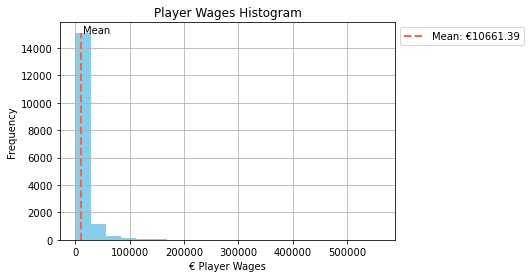

In [64]:
# Let's plot a Histogram for the Player Wage to get an idea of the distribution of the Wages in the dataset
# Linear Scale

# The mean of the Player Wages are marked on the histogram
w_mean = df['Wage (€)'].mean()
print(f"The mean of the Player's Wages are: €{w_mean:.2f}")

# The maximum salary being received by a Player
w_max = df['Wage (€)'].max()
print(f"The mean of the Player's Wages are: €{w_max:.2f}")

plt.hist(data = df, x = 'Wage (€)', color = "skyblue", bins=20)
plt.axvline(x=w_mean, color='tomato', ls='--', ymax=0.95, lw=2, label="Mean: €{:.2f}".format(w_mean))
plt.text(w_mean*1.3,15100,'Mean',rotation=0)
plt.xlabel("€ Player Wages")
plt.ylabel("Frequency")
plt.grid()
plt.title("Player Wages Histogram")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

So above we can see a heavily right skewed graph, visually it appears that majority of the Wages that the FIFA soccer players receive is under €50,000 and only a few receive any higher than €100,000.

Let's view the above on a logarithmic scale (below) to better visualize the skewness amongst the data.

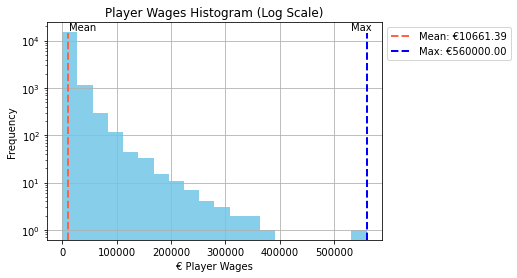

In [65]:
plt.hist(data = df, x = 'Wage (€)', color = "skyblue", bins=20)
plt.axvline(x=w_mean, color='tomato', ls='--', ymax=0.95, lw=2, label="Mean: €{:.2f}".format(w_mean))
plt.axvline(x=w_max, color='blue', ls='--', ymax=0.95, lw=2, label="Max: €{:.2f}".format(w_max))
plt.text(w_mean*1.1,17000,'Mean',rotation=0)
plt.text(w_max*0.95,17000,'Max',rotation=0)
plt.xlabel("€ Player Wages")
plt.ylabel("Frequency")
plt.grid()
plt.yscale("log")
plt.title("Player Wages Histogram (Log Scale)")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

In [66]:
# Calculate the Inter-Quartile Ranges (IQR)
df['Wage (€)'].quantile([0.25,0.5,0.75])

0.25     1000.0
0.50     3000.0
0.75    11000.0
Name: Wage (€), dtype: float64

Q2 is the 50th percentile, this is the Median, therefore this tells us that half of the Players in the dataset have a salary of €3000 or less. With majority (75th percentile, or Q3) of the Players earning €11000 or less. This indicates that most FIFA players don't, comparatively speaking, earn the large sums of money that a few players make.

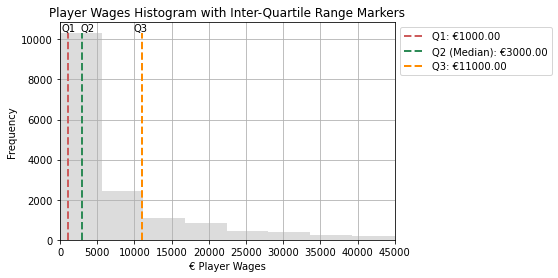

In [67]:
Q1 = df['Wage (€)'].quantile([0.25])
Q2 = df['Wage (€)'].quantile([0.50])
Q3 = df['Wage (€)'].quantile([0.75])

plt.hist(data = df, x = 'Wage (€)', color = "gainsboro", bins=100)
plt.axvline(x=float(Q1), color='indianred', ls='--', ymax=0.95, lw=2, label="Q1: €{:.2f}".format(float(Q1)))
plt.axvline(x=float(Q2), color='seagreen', ls='--', ymax=0.95, lw=2, label="Q2 (Median): €{:.2f}".format(float(Q2)))
plt.axvline(x=float(Q3), color='darkorange', ls='--', ymax=0.95, lw=2, label="Q3: €{:.2f}".format(float(Q3)))
plt.text(Q1*0.2,10400,'Q1',rotation=0)
plt.text(Q2*0.9,10400,'Q2',rotation=0)
plt.text(Q3*0.9,10400,'Q3',rotation=0)
plt.xlabel("€ Player Wages")
plt.ylabel("Frequency")
plt.grid()
plt.title("Player Wages Histogram with Inter-Quartile Range Markers")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xlim(0,45000);

The above histogram shows that up to 75% of the dataset (Q3) exists Players with a salary of no greater than €11,000. A limit on the y-axis has been placed between (0, 45000) so that we can see the shape of the graph in more detail for Q1, Q2 and Q3.

So, what are the reasons for the broad range of salaries? We will explore several variables to ascertain the relationships between the variables and find insights to explain this. Variables such as the following will be explored:
* Player Country
* Player Club
* Age (we'll investigate if the age really makes a difference to the wages)
* The existing monetary value of the player
* Skill variables such as: Attacking, Defending, Goalkeeping etc.
* Player Potential

We will also do an analysis of the Players with similar skillsets and contrast their salaries.